# Merge the analysis from 01,02,03 mask analysis notebook from individual mask analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sys, os
#from cellpose import io
from skimage import io
from skimage.measure import label, regionprops

other_dir_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..','..'))
sys.path.append(other_dir_path)

import IMCprocess.spatial_analysis.mask_utils as mu
import IMCprocess.utils.utils as ut

## Create IMG mask object with cell, cancer and tissue mask

In [ ]:
def create_cell_in_region_table(Cell_mask, Region_mask):
    cells_in_Reg, cells_outside_Reg = mu.cell_in_region(Cell_mask.mask_regprops, 
                                                        Region_mask.mask_regprops)
    # add number of cells in each region to the table
    cell_in_reg_tb =Region_mask.mask_df.copy()
    cell_in_reg_tb['num_cells'] = cell_in_reg_tb['label'].map(lambda x: len(cell_in_reg_tb[x]))
    cell_in_reg_tb['cells_in_region'] = cell_in_reg_tb['label'].map(
        lambda x: cell_in_reg_tb[x])
    return cell_in_reg_tb
    

In [2]:
def full_pipeline_IMG_mask(labeled_anndata, img_id, 
                    cell_mask_file, 
                    cancer_mask_file, 
                    tissue_mask_file  ):
    # 1. Get only the object for image R2_002
    Img_adata = labeled_anndata[labeled_anndata.obs['img_id'] == img_id]
    # 2. Create mask object for Cell_mask, cancer_mask and tissue_mask
    Cell_mask = mu.Mask(mask_file=cell_mask_file,
                        img_id=img_id, mask_type='cell_mask')
    Cancer_mask = mu.Mask(mask_file=cancer_mask_file,
                          img_id=img_id, mask_type='cancer_mask')
    Tissue_mask = mu.Mask(mask_file=tissue_mask_file,
                          img_id=img_id, mask_type='tissue_mask')
    # 3. Create Img_mask object
    Img_object = mu.Img_mask(Img_adata, Cell_mask, Cancer_mask, Tissue_mask)

    # 4. plot_outline masks and save in the folder 'output/outline_masks'
    if not os.path.exists('output/outline_masks'):
        os.makedirs('output/outline_masks')
        print("output/outline_masks folder created successfully")
    else:
        print("output/outline_masks Folder already exists")

    print("Plotting outline masks for image {}".format(img_id))
    Img_object.plot_outline_mask(masktype='cell_mask', output_file='output/outline_masks/{}_cell_mask.png'.format(img_id))
    Img_object.plot_outline_mask(masktype='cancer', output_file='output/outline_masks/{}_cancer_mask.png'.format(img_id))
    Img_object.plot_outline_mask(masktype='tissue', output_file='output/outline_masks/{}_tissue_mask.png'.format(img_id))

    # 5. plot outline masks with labels and save in the folder 'output/outline_masks'
    mu.plt_outline_label(Cancer_mask.pixels, 
                         Cancer_mask.mask_regprops,
                         Cancer_mask.mask_labeled,
                         output_file='output/outline_masks/{}_cancer_mask_label.png'.format(img_id))
    mu.plt_outline_label(Tissue_mask.pixels, 
                         Tissue_mask.mask_regprops,
                         Tissue_mask.mask_labeled,
                         output_file='output/outline_masks/{}_tissue_mask_label.png'.format(img_id))

    # 6. check cell_i in cancer_mask
    
    
    

In [3]:
data_path = '/Users/pattama/Desktop/UiB/cancer/example_share_code/share_with_vladan/mask_analysis/example_data/'
data_lev1 = ut.read_pickle_obj(data_path+'00hanna_adata_totalNB_obj_Level1.pkl')

In [4]:
data_lev1.adata_dict

{'level1': AnnData object with n_obs × n_vars = 132951 × 51
     obs: 'img_id', 'PhenoGraph_clusters', 'level1_annotated'
     uns: 'pca', 'PhenoGraph_Q', 'PhenoGraph_k', 'neighbors', 'umap', 'PCs', 'dendrogram_PhenoGraph_clusters', 'PhenoGraph_clusters_colors', 'level1_annotated_colors'
     obsm: 'spatial', 'X_pca', 'X_umap'
     obsp: 'distances', 'connectivities'}

output/outline_masks folder created successfully
Plotting outline masks for image R2_002


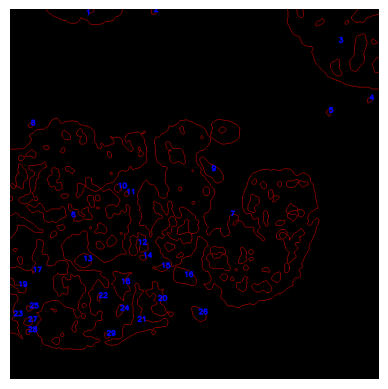

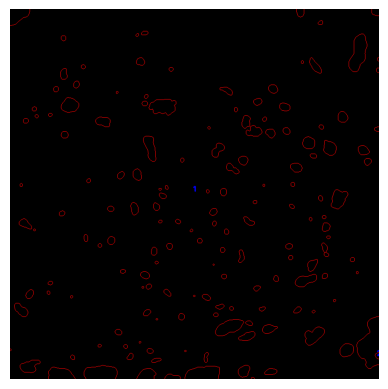

In [5]:
# create IMG_mask object for image R2_002 that label for level1
full_pipeline_IMG_mask(labeled_anndata = data_lev1.adata_dict['level1'], 
                img_id='R2_002', 
                cell_mask_file=data_path+'Patient2_002.tiff',
                cancer_mask_file=data_path+'Patient2_002_cancer_mask.tiff',
                tissue_mask_file=data_path+'Patient2_002_tissue_mask.tiff')

In [6]:
# Get only the object for image R2_002
# You can change image name to get other images
obj_level1 = data_lev1.adata_dict['level1']
obj_R2_002_lev1 = obj_level1[obj_level1.obs['img_id'] == 'R2_002']

In [7]:
obj_level1.obs['img_id'].unique()

['R1_001', 'R1_002', 'R1_003', 'R2_001', 'R2_002', ..., 'R9_002', 'R9_003', 'R10_001', 'R10_002', 'R10_003']
Length: 30
Categories (30, object): ['R1_001', 'R1_002', 'R1_003', 'R2_001', ..., 'R9_003', 'R10_001', 'R10_002', 'R10_003']

In [8]:
# Create object for Cell_mask, cancer_mask and tissue_mask
Cell_mask = mu.Mask(mask_file='../example_data/Patient2_002.tiff',
                    img_id='R2_002', mask_type='cell_mask')
Cancer_mask = mu.Mask(mask_file='../example_data/Patient2_002_cancer_mask.tiff',
                    img_id='R2_002', mask_type='cancer_mask')
Tissue_mask = mu.Mask(mask_file='../example_data/Patient2_002_tissue_mask.tiff',
                    img_id='R2_002', mask_type='tissue_mask')

In [9]:
# mask object has mask_df attribute to get the mask data
Tissue_mask.mask_df

,label,area,centroid_x,centroid_y
0,1,588488,390.951374,390.677767
1,2,95,785.936842,742.515789


In [10]:
Img_R2_002 = mu.Img_mask(obj_R2_002_lev1, Cell_mask, Cancer_mask, Tissue_mask)

In [11]:
Img_R2_002.img_mask_adata

View of AnnData object with n_obs × n_vars = 4577 × 51
    obs: 'img_id', 'PhenoGraph_clusters', 'level1_annotated'
    uns: 'pca', 'PhenoGraph_Q', 'PhenoGraph_k', 'neighbors', 'umap', 'PCs', 'dendrogram_PhenoGraph_clusters', 'PhenoGraph_clusters_colors', 'level1_annotated_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [19]:
Cancer_mask.mask_df

,label,area,centroid_x,centroid_y
0,1,3892,162.641316,12.951953
1,2,122,307.000000,5.098361
2,3,21349,703.838306,71.922432
3,4,101,769.653465,194.663366
4,5,118,682.016949,221.449153
5,6,68937,130.020018,445.370309
6,7,69068,471.997437,443.531520
7,8,98,44.000000,248.632653
8,9,1390,431.846043,346.306475
9,10,236,230.593220,383.368644


In [16]:
cell_in_cancer, cell_outside_cancer = mu.cell_in_region(Cell_mask.mask_regprops, Cancer_mask.mask_regprops)

In [18]:
cell_outside_cancer
# add number of cells in each region to the table
cancer_reg['num_cells'] = cancer_reg['label'].map(lambda x: len(cell_in_cancer[x]))
cancer_reg['cells_in_region'] = cancer_reg['label'].map(
    lambda x: cell_in_cancer[x])
cancer_reg

[1,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 35,
 42,
 43,
 46,
 49,
 50,
 52,
 53,
 56,
 57,
 58,
 59,
 61,
 65,
 69,
 70,
 71,
 74,
 75,
 77,
 82,
 86,
 87,
 88,
 89,
 91,
 95,
 96,
 97,
 98,
 101,
 102,
 107,
 108,
 109,
 110,
 111,
 115,
 116,
 119,
 124,
 125,
 126,
 128,
 129,
 130,
 131,
 135,
 136,
 138,
 139,
 140,
 141,
 143,
 151,
 152,
 156,
 157,
 158,
 160,
 161,
 162,
 163,
 167,
 168,
 172,
 173,
 174,
 175,
 176,
 177,
 179,
 180,
 181,
 183,
 186,
 187,
 189,
 190,
 191,
 192,
 193,
 194,
 196,
 197,
 198,
 199,
 200,
 201,
 206,
 207,
 208,
 209,
 210,
 212,
 213,
 217,
 218,
 219,
 220,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 236,
 237,
 238,
 239,
 240,
 242,
 243,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 254,
 255,
 256,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 290,
 291,
 292,
 293,
 294,
 295,
 297,
 298,
 299,
 300,
 